# Apendizaje No Supervisado

## Preliminares

In [1]:
# Importación de librerías comunes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [ ]:
# Usen el método de aquisición de datos que gusten o les resulte cómodo
#from google.colab import drive
#drive.mount('/content/drive')

In [236]:
file = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP3/census.csv'
# Se recomienda usar la codificación 'latin-1' por el tipo de datos censales
df = pd.read_csv(file, encoding='latin-1')


Algunas exploraciones y preparación de datos (que pueden modificar si lo desean... pero traten de no agregar ni sacar columnas)

In [237]:
df.shape

(32561, 15)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [239]:
# Existen algunas celdas con '?'. Las codificaremos como NaN
df[df == '?'] = np.nan

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [241]:
# Ahora recorreremos las columnas en la lista e inputaremos los datos
# nulos (como son variables categóricas, las imputaremos con el
# valor más frecuente, la moda)
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [242]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [243]:
# Separamos los datos de entrada (características) de la salida esperada (etiqueta)
X = df.drop(['income'], axis=1)
y = df['income']

In [244]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [245]:
# Separamos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Un poco de Ingeniería de Características...

In [246]:
# Vamos a codificar las variables categóricas
# Aplicaremos simplemente un LabelEncoder()
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [247]:
# Ahora escalaremos los datos de entrenamiento y prueba.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [248]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


## Modelo de Regresión Logística con todas las caracteríticas

In [249]:
# Finalmente creamos un modelo de Regresión y lo entrenamos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Exactitud del modelo de Regresión Logística con todas las caracteríticas: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Exactitud del modelo de Regresión Logística con todas las caracteríticas: 0.8217


# Ahora a trabajar...

1. Les propongo primero hacer una breve exploración de los datos originales (pueden usar gráficos tipo pair-plot, de densidad, de barras; pueden usar resultados estadísticos con describe(), por ejemplo) y decidir **con cuántas columnas menos** entrenar para lograr un mejor (o igual, en general) accuracy o exactitud.

2. Hacer un PCA sobre el conjunto de datos original, tratando de analizar la variaza explicada y seleccionado un porcentaje que permita reducir el conjunto de datos de entrada logrando un mejor (o igual, en general) accuracy o exactitud.

3. Reportar los resultados en una tabla comparativa del modelo original, el modelo con una exploración "a ojo" y el modelo con reducción de dimensionalidad con PCA con una breve conclusión.

## 1.

#Leemos los datos

In [250]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [252]:
# Analizando el tamaño del conjunto de datos:
print ("Tamaño del set de datos como tupla : ", df.shape)
print ("Filas                              : ", df.shape[0])
print ("Columnas                           : ", df.shape[1])
# Listando el conjunto de características (nombre de columnas):
print ("-"*40,"\nCaracteríticas:")
print (df.columns.tolist())
# Listando la cantidad de valores nulos por columna (de mayor a menor):
print ("-"*40,"\nValores nulos:\n")
print (df.isnull().sum().sort_values(ascending = False))
# Listando el porcentaje de valores nulos sobre el total:
print ( "-"*40,"\nPorcentaje de valores nulos:\n")
print (round(df.isnull().sum() * 100 / df.isnull().count(), 2))

Tamaño del set de datos como tupla :  (32561, 15)
Filas                              :  32561
Columnas                           :  15
---------------------------------------- 
Caracteríticas:
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
---------------------------------------- 
Valores nulos:

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
---------------------------------------- 
Porcentaje de valores nulos:

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relation

In [253]:
# Listando la cantidad de valores únicos por columna:
print ("-"*40,"\nValores únicos:\n")
print (df.nunique())

---------------------------------------- 
Valores únicos:

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [255]:
#Transformamos las variables workclass, education, marital.status, occupation, relationship, race, capital.gain, capital.loss, 
# hours.per.week y native.country a categoricas
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 
                       'relationship', 'race', 'native.country','sex','income']

df[categorical_columns] = df[categorical_columns].astype('category')

In [256]:
#Verificamos el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


#Análisis univariado

In [257]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

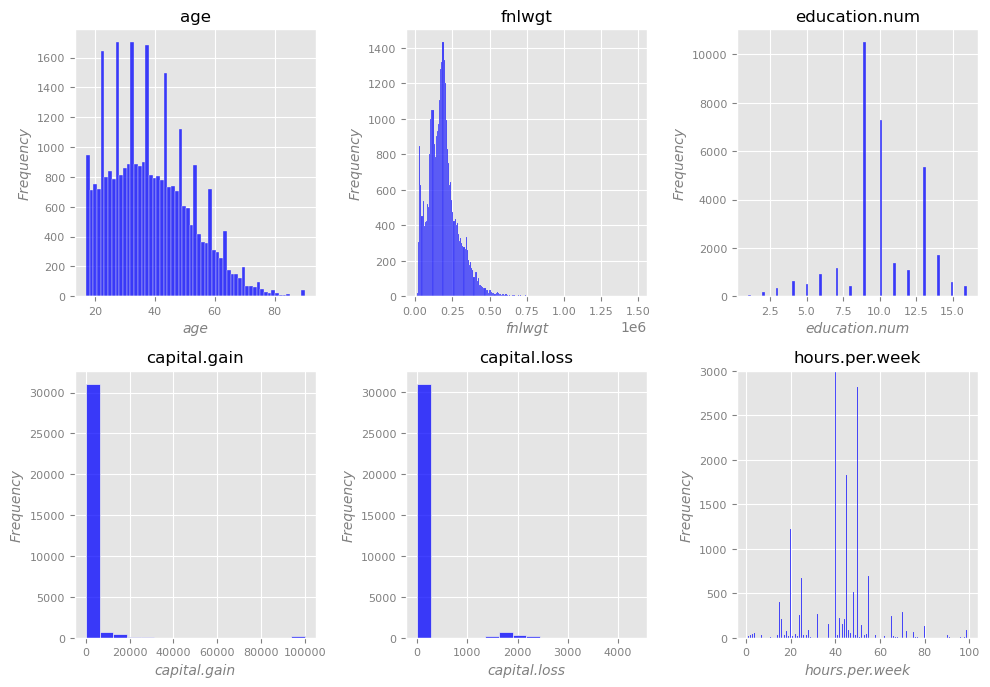

In [258]:
#Vemos los gráficos para las variables tipo numéricas
plt.style.use('ggplot')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[variable], kde=False, color='blue')
    plt.title(variable, fontsize=12)
    plt.xlabel(variable, fontsize=10, color='gray', fontstyle='italic')  
    plt.ylabel('Frequency', fontsize=10, color='gray', fontstyle='italic')  
    plt.tick_params(axis='x', labelsize=8, colors='gray')  
    plt.tick_params(axis='y', labelsize=8, colors='gray')

    if variable == 'hours.per.week':
        plt.ylim(0, 3000)

    plt.tight_layout()

plt.show()

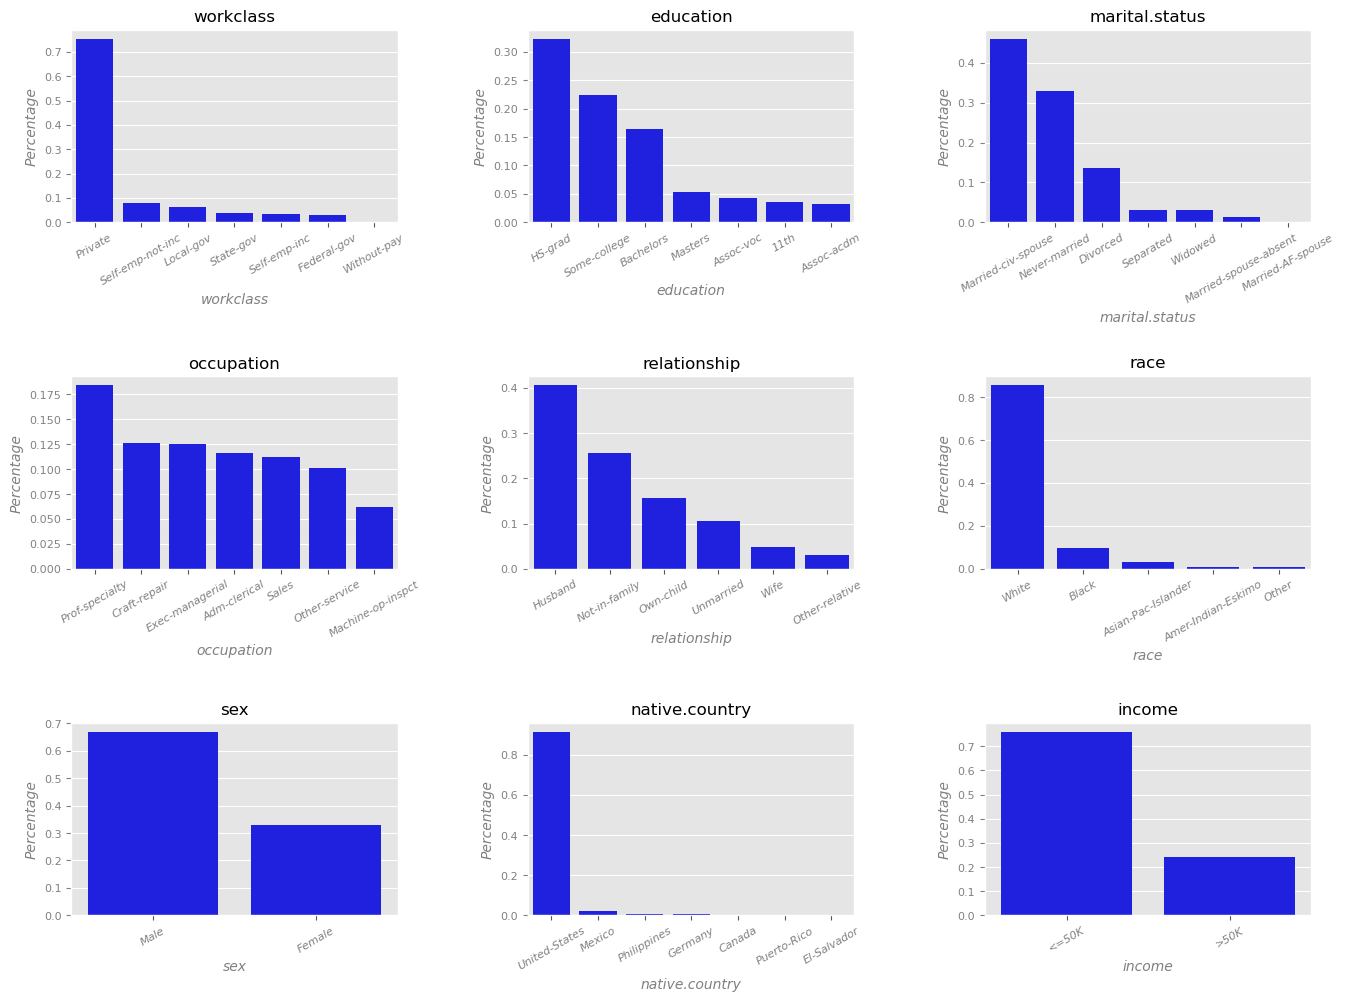

In [259]:
#Vemos los gráficos para las variables tipo categoricas (restringido a un top 7)
categorical_columns = df.select_dtypes(include='category').columns.tolist()
plt.figure(figsize=(16, 16))
gs = GridSpec((len(categorical_columns) + 3) // 3, 3, hspace=0.8, wspace=0.4)  

for i, variable in enumerate(categorical_columns):
    ax = plt.subplot(gs[i])  
    percentage_df = df[variable].value_counts(normalize=True).reset_index()
    percentage_df.columns = [variable, 'Percentage']
    percentage_df.sort_values(by='Percentage', ascending=False, inplace=True)
    top_7_df = percentage_df.head(7)
    sns.barplot(x=variable, y='Percentage', data=top_7_df, ax=ax, color='blue', order=top_7_df[variable])
    ax.set_title(variable, fontsize=12)  
    ax.set_xticks(range(len(top_7_df)))  
    ax.set_xticklabels(top_7_df[variable], rotation=30, fontsize=8, fontstyle='italic', color='gray')  
    ax.tick_params(axis='y', labelsize=8, colors='gray')  
    ax.set_ylabel('Percentage', fontsize=10, fontstyle='italic', color='gray')  
    ax.set_xlabel(variable, fontsize=10, fontstyle='italic', color='gray')  
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [260]:
#Transformamos las variables sex e income a binarias
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0}).astype(int)
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0}).astype(int)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  int32   
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  int32   
dtypes: category(7), int32(2), int64(6)
memory usage: 2.0 MB


In [262]:
#Creamos un nuevo df con las variables tipo entero
df_int = df.select_dtypes(include='int')

In [263]:
df_int.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,0,4356,40,0
1,82,132870,9,0,0,4356,18,0
2,66,186061,10,0,0,4356,40,0
3,54,140359,4,0,0,3900,40,0
4,41,264663,10,0,0,3900,40,0


#Matriz de correlación

In [264]:
#Planteamos la matriz de correlación respecto a la columna objetivo "income", para las variables de tipo entero
correlation_matrix = df_int.corr()
income_correlation = correlation_matrix['income']
income_correlation_sorted = income_correlation.sort_values(ascending=False)
print(income_correlation_sorted)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
fnlwgt           -0.009463
Name: income, dtype: float64


#Seleccionamos los 5 atributos principales para el modelo de Regresión Logística: 

    #education.num
    #age
    #hours.per.week
    #capital.gain
    #sex

In [265]:
X = df[['education.num', 'age', 'hours.per.week', 'capital.gain', 'sex']] 
y=df['income']
X = X.values
y = y.values
X,y

(array([[ 9, 90, 40,  0,  0],
        [ 9, 82, 18,  0,  0],
        [10, 66, 40,  0,  0],
        ...,
        [ 9, 40, 40,  0,  1],
        [ 9, 58, 40,  0,  0],
        [ 9, 22, 20,  0,  1]], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0]))

#Split del dataset

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [267]:
print('Cantidad de datos para entrenamiento: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))

Cantidad de datos para entrenamiento:  26048
Cantidad de datos para test:  6513


#Ahora aplicamos el modelo de Regresión Logística

In [268]:
classifier = LogisticRegression()

In [269]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [270]:
print('Vector de coeficientes de la función lineal: ', classifier.coef_)
print('Ordenada en el origen (W0): ', classifier.intercept_)

Vector de coeficientes de la función lineal:  [[3.33504556e-01 4.20813828e-02 3.31572647e-02 2.91708332e-04
  1.12445235e+00]]
Ordenada en el origen (W0):  [-8.81740723]


#Ahora se va a corroborar como funciona el modelo con los datos de entrenamiento

In [271]:
y_pred_train = classifier.predict(X_train)

In [272]:
print('Etiquetas de train reales:    ', y_train[:20])
print('Etiquetas de train predichas: ', y_pred_train[:20])

Etiquetas de train reales:     [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0]
Etiquetas de train predichas:  [0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]


#Score de los datos de entrenamiento: 

In [273]:
classifier.score(X_train, y_train)

0.8175675675675675

#Ahora veeremos el desempeño del test: 

In [274]:
y_pred_test = classifier.predict(X_test)

In [275]:
print('Etiquetas de test reales:    ', y_test[:20])
print('Etiquetas de test predichas: ', y_pred_test[:20])

Etiquetas de test reales:     [1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Etiquetas de test predichas:  [0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0]


In [276]:
print('Accuracy en test: ', classifier.score(X_test, y_test))

Accuracy en test:  0.8246583755565792


#Vemos que utilizando solo 5 columnas, se obtuvo un accuracy muy similar al modelo original que utilizó todas los atributos

## 2.

#Leemos los datos

In [277]:
df = pd.read_csv(file, encoding='latin-1')

In [278]:
# Existen algunas celdas con '?'. Las codificaremos como NaN
df[df == '?'] = np.nan

In [279]:
# Ahora recorreremos las columnas en la lista e inputaremos los datos
# nulos (como son variables categóricas, las imputaremos con el
# valor más frecuente, la moda)
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [280]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [282]:
# Separamos los datos de entrada (características) de la salida esperada (etiqueta)
X = df.drop(['income'], axis=1)
y = df['income']

In [283]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


#Aplicamos Ingenieria de las características

In [284]:
# Vamos a codificar las variables categóricas
# Aplicaremos simplemente un LabelEncoder()
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

In [285]:
# Ahora escalaremos los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [286]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


In [287]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

#Estandarización de las características

In [288]:
from sklearn.preprocessing import StandardScaler

columns = len(X.columns)
print("Características: ", columns) 

sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X[:1]   

Características:  14


array([[ 3.76961234, -0.08529633, -1.06799736,  0.18133163, -0.42005962,
         2.24948009,  0.72023651, -0.27780504,  0.39366753, -1.42233076,
        -0.14592048, 10.59350656, -0.03542945,  0.26136999]])

#Hacemos la transformación PCA

In [289]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

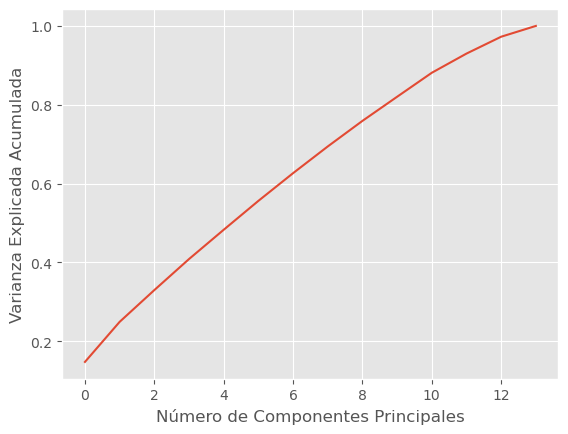

In [290]:
#Decidiremos con cuántas características nos vamos a quedar
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada');

In [291]:
#Vamos a entrenar el modelo con diferentes valores de PCA y analizaremos los resultados.
values = range(1, columns + 1)
y = df["income"]
for i in values:
  print(i,"Componentes principales")
  pca = PCA(n_components= i)
  X_pca = pca.fit_transform(scaled_X)
  X = X_pca
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25
                                                      , random_state = 31)
  logreg = LogisticRegression(solver='liblinear', penalty = 'l1')
  logreg.fit(X_train,y_train)
  y_pred = logreg.predict(X_test)
  logreg_accy = round(accuracy_score(y_pred,y_test), 4)

  print(sum(pca.explained_variance_ratio_))
  print("Accuracy:", logreg_accy)
  print('*'*30)

1 Componentes principales
0.14783222072790617
Accuracy: 0.7925
******************************
2 Componentes principales
0.24943817550517067
Accuracy: 0.8001
******************************
3 Componentes principales
0.3300081530923814
Accuracy: 0.8005
******************************
4 Componentes principales
0.4087121531356733
Accuracy: 0.8048
******************************
5 Componentes principales
0.482987673303086
Accuracy: 0.8056
******************************
6 Componentes principales
0.5562788563488221
Accuracy: 0.8044
******************************
7 Componentes principales
0.6265497436672989
Accuracy: 0.8058
******************************
8 Componentes principales
0.6942758339265453
Accuracy: 0.8067
******************************
9 Componentes principales
0.7591503469208832
Accuracy: 0.8251
******************************
10 Componentes principales
0.8203482619818151
Accuracy: 0.8243
******************************
11 Componentes principales
0.8811907598573696
Accuracy: 0.8247
*****

In [292]:
#Seleccionamos la cantidad de características para reducir la dimensionalidad
pca = PCA(n_components=9)
X_pca = pca.fit_transform(scaled_X)
X = X_pca
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg_accy = accuracy_score(y_pred,y_test)
print("Accuracy aplicando PCA:", logreg_accy)

Accuracy aplicando PCA: 0.8250829136469722


#Vemos que con 9 caracteristicas podemos alcanzar un accuracy mayor al modelo original. Además dicha cantidad de características explican más del 75% de los datos

## 3. 

#Comparación de los 3 modelos

A continuación vemos una tabla comparativa de accuracy:

|Modelo original| EDA + Regresión Logistica |Análisis PCA
|:-| :- | :-
|0.8218| 0.8246 | 0.8251

Al observar los resultados podemos realizar las siguientes conclusiones: 

- Luego del análisis exploratorio de datos EDA, se obtuvo un accuracy mayor que el modelo original (que utilizó todas las caracteristicas), utilizando sólo 5 de las 14 características, al aplicar el modelo de Regresión Logística.
- Finalmente, al realizar un PCA al conjunto de datos, se obtuvo el máximo accuracy, al trabajar con 9 de las 14 características. 
- De todas formas, vemos que los 3 resultados de exactitud obtenidos son muy próximos. 